<a href="https://colab.research.google.com/github/acafiero/sports-project2/blob/main/Cafiero_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score, classification_report, confusion_matrix

 ## *Dataset*
 1) github / Five Thirty Eight

 2) statistical data for modern NBA players

 3) What is the statiscal threshold of WAR and RAPTOR a player needs to reach to be worth signing

 4) Regression

 5) 21 features

 6) 4078 rows

 7) There are multiple entries for the same player that needed to be reduced and averaged out, several features that are redudant to the study and an excess of negative floats that could inaccurately affect the outcome

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = 'https://raw.githubusercontent.com/acafiero/sports-project2/main/modern_RAPTOR_by_player.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Quincy Acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,-1.565257,-0.216477,-1.781734,0.415918,0.415918,0.000000,-1.464417,-0.223754,-1.688171,-0.554898


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           4079 non-null   object 
 1   player_id             4079 non-null   object 
 2   season                4079 non-null   int64  
 3   poss                  4079 non-null   int64  
 4   mp                    4079 non-null   int64  
 5   raptor_box_offense    4078 non-null   float64
 6   raptor_box_defense    4078 non-null   float64
 7   raptor_box_total      4078 non-null   float64
 8   raptor_onoff_offense  4078 non-null   float64
 9   raptor_onoff_defense  4078 non-null   float64
 10  raptor_onoff_total    4078 non-null   float64
 11  raptor_offense        4079 non-null   float64
 12  raptor_defense        4079 non-null   float64
 13  raptor_total          4079 non-null   float64
 14  war_total             4079 non-null   float64
 15  war_reg_season       

In [6]:
df.duplicated().sum()

## no duplicated values

0

In [7]:
df.nunique()

## checking all the various features

player_name             1192
player_id               1187
season                     8
poss                    2867
mp                      2130
raptor_box_offense      4078
raptor_box_defense      4078
raptor_box_total        4078
raptor_onoff_offense    4077
raptor_onoff_defense    4077
raptor_onoff_total      4077
raptor_offense          4079
raptor_defense          4079
raptor_total            4079
war_total               4079
war_reg_season          4075
war_playoffs            1717
predator_offense        4079
predator_defense        4079
predator_total          4079
pace_impact             4078
dtype: int64

In [8]:
df.isna().sum()

## checking for rows missing data

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      1
raptor_box_defense      1
raptor_box_total        1
raptor_onoff_offense    1
raptor_onoff_defense    1
raptor_onoff_total      1
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             1
dtype: int64

In [9]:
df.dropna()
df.isna().sum()

## dropped all rows missing values from the dataframe

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      1
raptor_box_defense      1
raptor_box_total        1
raptor_onoff_offense    1
raptor_onoff_defense    1
raptor_onoff_total      1
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             1
dtype: int64

In [10]:
df.drop(['player_name', 'player_id', 'season', 'raptor_box_offense', 'raptor_box_defense', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_offense', 'raptor_defense', 'raptor_box_total', 'war_reg_season', 'war_playoffs', 'predator_offense', 'predator_defense'], axis=1, inplace=True)
df.head()

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
0,2387,1135,-4.275564,-0.601411,1.249008,-0.961575,0.326413
1,2546,1244,-1.341421,-1.523468,0.777304,-1.287247,-0.456141
2,1279,588,-1.257688,-2.154538,0.178167,-3.034396,-0.268013
3,1581,749,-4.970491,-3.392775,-0.246055,-3.342885,0.329157
4,1716,847,-1.986306,-1.781734,0.415918,-1.688171,-0.554898


In [11]:
df = df.loc[df['war_total'] >= 1]
df = df.loc[df['predator_total'] >= 1]
df = df.loc[df['raptor_total'] >= 1]
df = df.loc[df['pace_impact'] >= 1]
df

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
127,6265,2872,5.543546,6.806518,14.269861,7.083689,1.319042
128,4894,2194,9.090994,8.778267,13.149613,7.521699,1.799512
129,6002,2813,5.111805,6.588248,13.666796,6.555088,1.096061
160,6225,3130,2.318868,2.146961,8.034787,2.400297,1.319376
272,6871,3415,2.518748,2.140857,8.669646,3.200148,1.108855
...,...,...,...,...,...,...,...
3948,4821,2266,3.572633,3.677213,7.619304,2.484788,1.523881
3949,5489,2589,1.722066,1.882814,6.274484,1.759520,2.511937
3978,4360,2026,2.538590,2.965017,5.983387,2.020089,1.298619
4051,4645,2120,1.766801,3.716428,7.192127,3.691880,2.888762


In [12]:
df.describe().round(2)

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
count,106.00,106.00,106.00,106.00,106.00,106.00,106.00
mean,4921.71,2344.43,3.98,4.55,9.32,4.87,1.61
std,1696.86,823.12,3.61,2.45,5.45,2.54,0.61
min,841.00,381.00,-3.30,1.11,1.13,1.13,1.00
25%,3954.00,1869.50,1.70,2.47,5.28,2.69,1.21
50%,5181.50,2400.00,3.86,4.23,8.09,4.68,1.38
75%,6304.75,3059.25,5.96,6.38,12.80,6.51,1.85
max,7947.00,3937.00,15.23,12.49,26.67,13.35,4.00


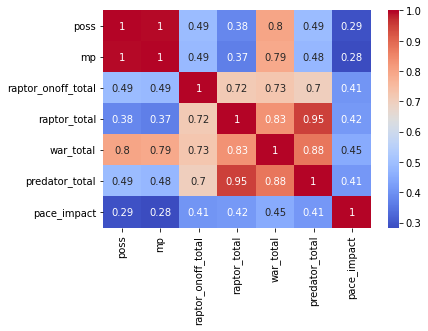

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

## we can see WAR, PREDATOR, total RAPTOR and Pace Impact have a fairly close correlations

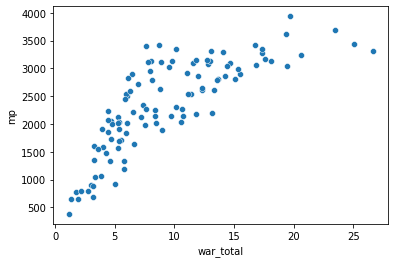

In [73]:
sns.scatterplot(data=df, x='war_total', y='mp', legend = False)

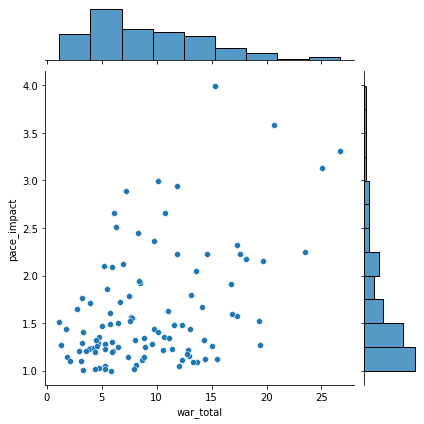

In [60]:
sns.jointplot(data=df, x='war_total', y='pace_impact', legend = False)

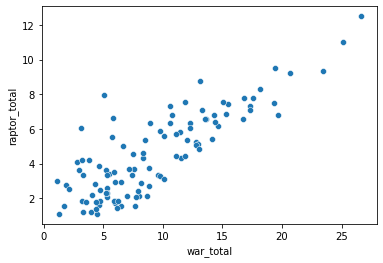

In [16]:
sns.scatterplot(data=df, x='war_total', y='raptor_total', legend = False)

## there are several distinct outliers that give us a better picture of who could be our ideal player

In [17]:
maxWAR = df[['war_total', 'raptor_total']].max()
print(maxWAR) 

war_total       26.666873
raptor_total    12.487858
dtype: float64


In [18]:
print('Our highest WAR candidate is ')
print(df[df.war_total == df.war_total.max()])

Our highest WAR candidate is 
     poss    mp  raptor_onoff_total  raptor_total  war_total  predator_total  \
902  7053  3314           11.189594     12.487858  26.666873       13.347925   

     pace_impact  
902     3.306111  


In [19]:
print('Our highest RAPTOR candidate is ')
print(df[df.raptor_total == df.raptor_total.max()])

## our top choice is averages 26.6 WAR, almost a 12.5 on RAPTOR

Our highest RAPTOR candidate is 
     poss    mp  raptor_onoff_total  raptor_total  war_total  predator_total  \
902  7053  3314           11.189594     12.487858  26.666873       13.347925   

     pace_impact  
902     3.306111  


In [20]:
x = df[['war_total', 'raptor_total']]
x

,war_total,raptor_total
127,14.269861,6.806518
128,13.149613,8.778267
129,13.666796,6.588248
160,8.034787,2.146961
272,8.669646,2.140857
...,...,...
3948,7.619304,3.677213
3949,6.274484,1.882814
3978,5.983387,2.965017
4051,7.192127,3.716428


In [21]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

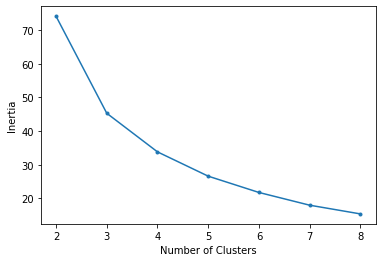

In [22]:
ks = range(2,9) 
inertias = []

for k in ks:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(scaled_x)
   inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

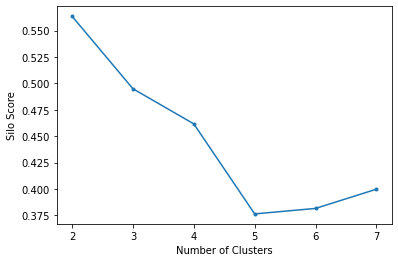

In [23]:
ks = range(2,8)
sil = []

for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_x)
  sil.append(silhouette_score(scaled_x, kmeans.labels_))

plt.plot(ks, sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silo Score')
plt.show()

In [24]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(scaled_x)
silhouette_score(scaled_x, kmeans.labels_)

0.3998763695205408

In [25]:
kmeans3 = KMeans(n_clusters = 3, random_state = 42)
kmeans3.fit(scaled_x)

KMeans(n_clusters=3, random_state=42)

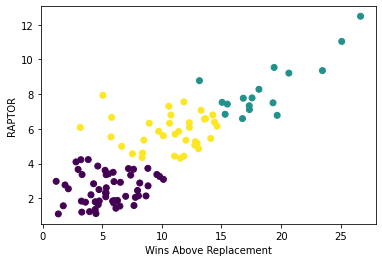

In [26]:
df['cluster3'] = kmeans3.labels_

plt.scatter(df['war_total'], df['raptor_total'], c = df['cluster3'])
plt.xlabel("Wins Above Replacement")
plt.ylabel("RAPTOR")
plt.show()

In [27]:
cluster_groups = df.groupby('cluster3', as_index=False).mean()
cluster_groups

,cluster3,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
0,0,4244.351852,2021.814815,1.852406,2.548608,5.475568,2.834505,1.409147
1,1,6740.882353,3212.705882,8.719294,8.316515,18.663305,8.866646,2.187841
2,2,5083.171429,2420.457143,4.954543,5.822017,10.710635,6.057404,1.638550


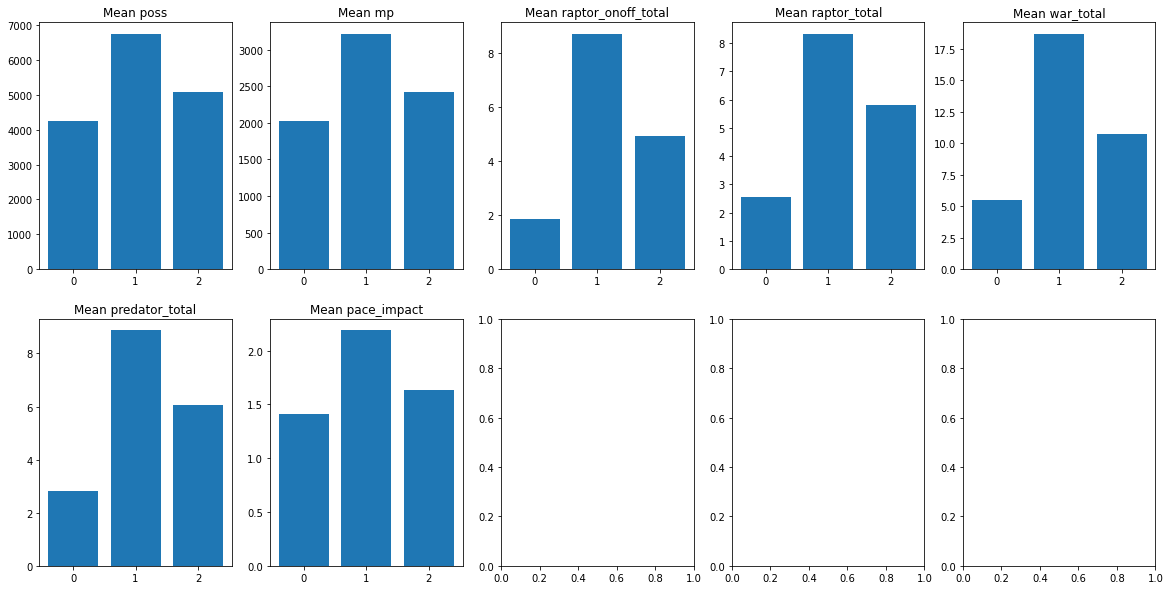

In [28]:
fig, axes = plt.subplots(2,5, figsize = (20, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster3'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [29]:
y = df['war_total']
X = df.drop(columns = 'war_total')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
pca = PCA(n_components = .98)
knn = KNeighborsRegressor()

preprocessor = make_pipeline(scaler, pca)

In [32]:
transformer = make_pipeline(scaler, pca)
knn_pca_pipe = make_pipeline(transformer, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.98))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [33]:
def evaluate_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE{rmse}')

In [34]:
knn_pca_pipe_trainpreds = knn_pca_pipe.predict(X_train)
knn_pca_pipe_testpreds = knn_pca_pipe.predict(X_test)

In [35]:
print('Training Data')
evaluate_model(y_train, knn_pca_pipe_trainpreds)
print('\n')
print('Test Data')
evaluate_model(y_test, knn_pca_pipe_testpreds)

Training Data
MAE 0.7687653814497225
 MSE 1.4274307956296834
 R^2 0.9483050884597957
 RMSE1.1947513530562264


Test Data
MAE 0.9439414835787582
 MSE 1.5566817992737885
 R^2 0.955037236366426
 RMSE1.2476705491730533


In [36]:
knn_pipe = make_pipeline(scaler, KNeighborsRegressor())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [37]:
pred_no_pca = knn_pipe.predict(X_test)
pred_no_pca

array([ 6.57188292,  3.30754004,  8.84869351,  4.6312234 , 18.26009402,
       12.94229314, 10.54381144,  5.95715345,  8.05152805,  5.01046354,
        5.21450259, 12.82553093, 13.29683015,  4.00711359,  2.81908711,
        2.65376318,  6.31914823, 15.74779539,  8.13539395, 17.7846155 ,
        6.00042081,  2.65376318, 12.71572599, 16.95555751, 21.15274203,
       12.71572599,  9.29713636])

In [38]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9535784761801103

In [39]:
d_tree = DecisionTreeRegressor(random_state = 42)
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
dtrain_pred = d_tree.predict(X_train)
dtest_pred = d_tree.predict(X_test)

In [41]:
dtrain_score = d_tree.score(X_train, y_train)
dtest_score = d_tree.score(X_test, y_test)
print(dtrain_score)
print(dtest_score)

1.0
0.808142230540813


In [42]:
d_tree.get_depth()

11

In [48]:
d_tree_12 = DecisionTreeRegressor(max_depth = 11, random_state = 42)
d_tree_12.fit(X_train, y_train)
dtrain_12_score = d_tree_12.score(X_train, y_train)
dtest_12_score = d_tree_12.score(X_test, y_test)
print(dtrain_12_score)
print(dtest_12_score)

1.0
0.808142230540813


In [53]:
d_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
d_tree_9.fit(X_train, y_train)
dtrain_9_score = d_tree_9.score(X_train, y_train)
dtest_9_score = d_tree_9.score(X_test, y_test)
print(dtrain_9_score)
print(dtest_9_score)

0.9999470975372419
0.9248824304933477


In [45]:
d_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
d_tree_5.fit(X_train, y_train)
dtrain_5_score = d_tree_5.score(X_train, y_train)
dtest_5_score = d_tree_5.score(X_test, y_test)
print(dtrain_5_score)
print(dtest_5_score)

## there is an approximate difference of .0711 between our training and testing data

0.9895867601133038
0.9184753800086208


## In comparison to the PCA and KNN without PCA, it can be seen that a Decision Tree Regression yields the least a mount of overfitting.